In [54]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import constants 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 25
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [55]:
from ion_properties import lead,xenon,calcium


In [56]:
# context = xo.ContextCpu(omp_num_threads=4)
context = xo.ContextCpu()

line = xt.Line.from_json('sps.json')
particle_ref=line.particle_ref
line.build_tracker()

clight=constants.speed_of_light
circumference=line.get_length()

Loading line from dict:   0%|          | 0/38786 [00:00<?, ?it/s]

Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Loop over both sig_delta and emittance

0it [00:00, ?it/s]

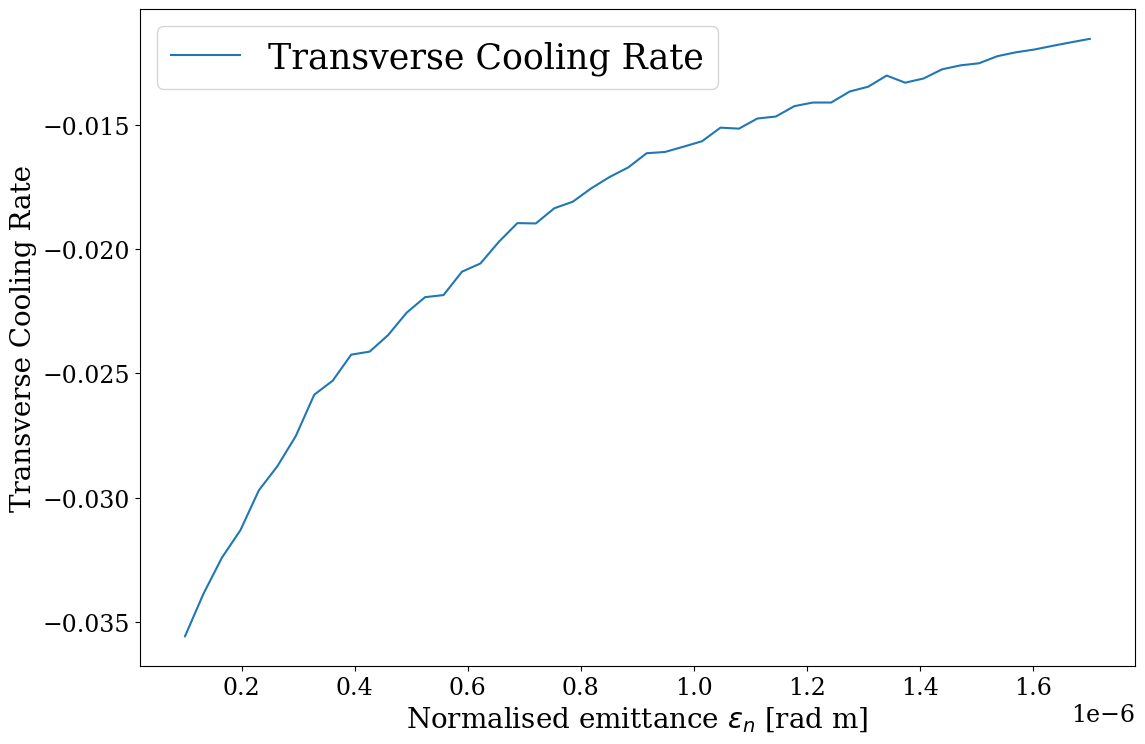

1it [00:00,  7.42it/s]


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

for i,ion_loop in tqdm(enumerate([lead])):

    # Define the injection parameters
    injection_nemitt = 1.5e-6  # m*rad (normalized emittance)
    injection_dp_p = 2e-4

    # Load data for 'lead'
    data = np.load(f'results/cooling_rate_scan/{ion_loop.name}.npz')

    transverse_cooling_rate_array = data['transverse_cooling_rate_array']
    longitudinal_growth_rate_array = data['longitudinal_growth_rate_array']

    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']

    # Select a specific sig_delta value (e.g., the first one in the list)
    sig_delta_index = 0
    transverse_cooling_rate = transverse_cooling_rate_array[sig_delta_index]

    # Plot transverse cooling rate as a function of n_emitt_list
    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})

    plt.plot(n_emitt_list, transverse_cooling_rate, label='Transverse Cooling Rate')
    #plt.scatter(0.98 * injection_nemitt, transverse_cooling_rate[np.argmin(np.abs(n_emitt_list - 0.98 * injection_nemitt))], color='red', label='Injection Point')
    #plt.text(0.97 * injection_nemitt, transverse_cooling_rate[np.argmin(np.abs(n_emitt_list - 0.98 * injection_nemitt))], 'Injection', color='red', fontsize=20, ha='right')

    plt.xlabel('Normalised emittance $\\epsilon_n$ [rad m]', fontsize=20)
    plt.ylabel('Transverse Cooling Rate', fontsize=20)
    plt.legend()
    plt.tight_layout()
    plt.show()


0it [00:00, ?it/s]

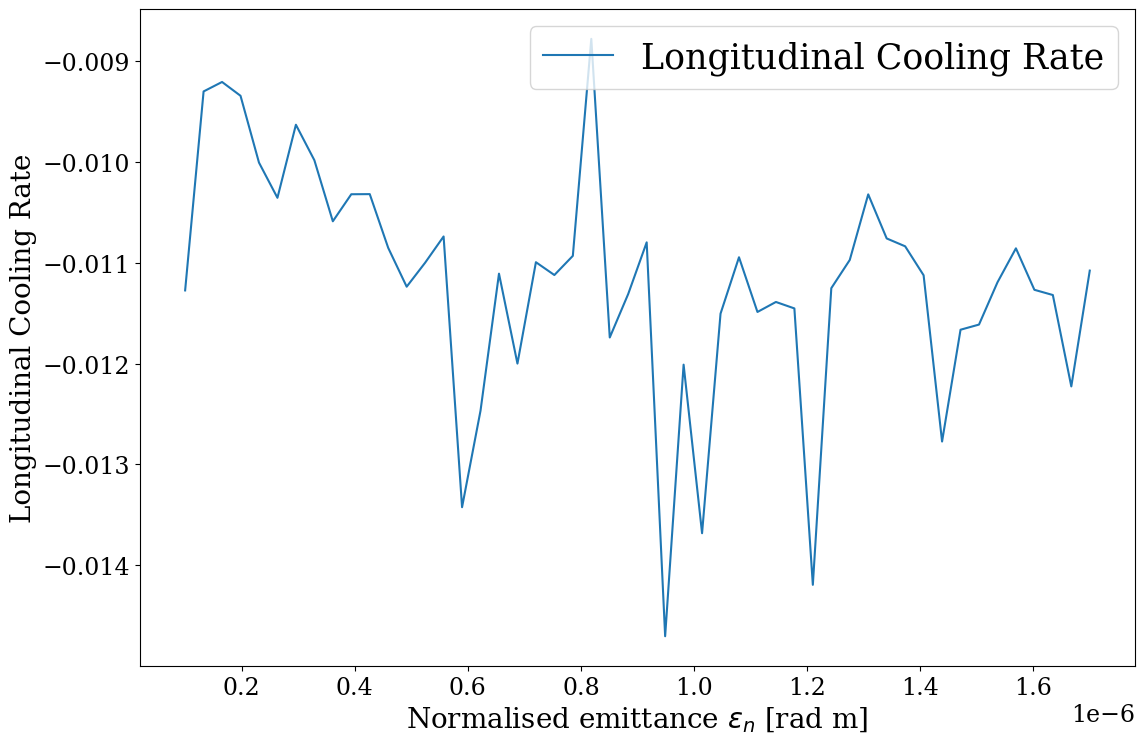

1it [00:00,  6.53it/s]


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

for i,ion_loop in tqdm(enumerate([lead])):

    # Define the injection parameters
    injection_nemitt = 1.5e-6  # m*rad (normalized emittance)
    injection_dp_p = 2e-4

    # Load data for 'lead'
    data = np.load(f'results/cooling_rate_scan/{ion_loop.name}.npz')

    transverse_cooling_rate_array = data['transverse_cooling_rate_array']
    longitudinal_growth_rate_array = data['longitudinal_growth_rate_array']

    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']

    # Select a specific sig_delta value (e.g., the first one in the list)
    sig_delta_index = 0
    longitudinal_growth_rate_array = longitudinal_growth_rate_array[sig_delta_index]

    # Plot transverse cooling rate as a function of n_emitt_list
    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})

    plt.plot(n_emitt_list, longitudinal_growth_rate_array, label='Longitudinal Cooling Rate')
    #plt.scatter(0.98 * injection_nemitt, transverse_cooling_rate[np.argmin(np.abs(n_emitt_list - 0.98 * injection_nemitt))], color='red', label='Injection Point')
    #plt.text(0.97 * injection_nemitt, transverse_cooling_rate[np.argmin(np.abs(n_emitt_list - 0.98 * injection_nemitt))], 'Injection', color='red', fontsize=20, ha='right')

    plt.xlabel('Normalised emittance $\\epsilon_n$ [rad m]', fontsize=20)
    plt.ylabel('Longitudinal Cooling Rate', fontsize=20)
    plt.legend()
    plt.tight_layout()
    plt.show()


xenon growth rates

In [59]:
# injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
# injection_dp_p = 2e-4

# for i,ion_loop in tqdm(enumerate([lead])):

#     data = np.load(f'results/cooling_rate_scan/{ion_loop.name}.npz')

#     transverse_cooling_rate_array = data['transverse_cooling_rate_array']
#     longitudinal_growth_rate_array = data['longitudinal_growth_rate_array']
    
#     sig_delta_list = data['sig_delta_list']
#     n_emitt_list = data['n_emitt_list']
   

#     plt.figure(figsize=(12, 8))
#     plt.rcParams.update({'font.size': 25})

#     # Plot the heatmap
#     plt.imshow(transverse_cooling_rate_array, extent=[n_emitt_list.min(), n_emitt_list.max(), sig_delta_list[0], sig_delta_list[-1]],
#                aspect='auto', origin='lower', cmap='viridis',norm=None)
       
#     cbar = plt.colorbar()
#     cbar.set_label('Horizontal growth rate', fontsize=20)

#     # Add injection point
#     plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
#     plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')

#     #contour = plt.contour(geo_epsx_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors='red', linewidths=2)
#     plt.xlabel('Normalised emittance $\\epsilon_n$ [rad m]', fontsize=20)
#     plt.ylabel('RMS dp/p', fontsize=20)
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#     plt.tight_layout()
#     # plt.savefig('Lead_cooling_IBS_regime.png', dpi=300)
#     plt.show()
